# Logistic Regression


Adapted from Jonathan Stray's risk-ratios repo
https://github.com/jstray/risk-ratios

In [ ]:
!open .

In [1]:
import pandas as pd
import numpy as np

Consider this recent [Miami Herald story](https://www.miamiherald.com/sports/nfl/article258302943.html) about the hiring of Black head coaches in the NFL:

> The chances of landing an NFL head coaching position were three times better for white candidates compared to their non-white counterparts — even after including the most recent hires and controlling for age, number of opportunities, previous coaching position and years of experience in the league.

How do we get to this conclusion? Let's look at the data, which can be downloaded from the Herald [here](https://docs.google.com/spreadsheets/d/1lVPgIu7OKg40trVMnVlzg5EvnAByxXJCWQqGL1qDBis/edit#gid=0). For this exercise we'll use a slightly reformmated version of the data, with one row per candidate per year (candidates often apply for multiple jobs in the same year).

In [46]:
url = "https://raw.githubusercontent.com/jstray/risk-ratios/main/FINAL_coaches_by_year.csv"
df = pd.read_csv(url)

df

,Unit_of_Analysis,Coach_ID,Name,Age,Hired,Year,Number_of_Interviews_That_Year,Previous_Job,Previous_Job_Coded,NFL_Playing_Experience,NFL_Coaching_Experience,Total_NFL_Experience,Black,White,Minority,OC,DC,HC
0,Aaron Glenn 2021,1,Aaron Glenn,48,0,2021,1,Other NFL Job,5,15,8,23,1,0,1,0,0,0
1,Aaron Glenn 2022,1,Aaron Glenn,49,0,2022,2,Defensive Coordinator,4,15,9,24,1,0,1,0,1,0
2,Adam Gase 2015,2,Adam Gase,36,0,2015,5,Offensive Coordinator,3,0,12,12,0,1,0,1,0,0
3,Adam Gase 2016,2,Adam Gase,37,1,2016,4,Offensive Coordinator,3,0,13,13,0,1,0,1,0,0
4,Adam Gase 2019,2,Adam Gase,40,1,2019,2,Head Coach Previous Season,1,0,16,16,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Vic Fangio 2018,119,Vic Fangio,59,0,2018,1,Defensive Coordinator,4,0,31,31,0,1,0,0,1,0
204,Vic Fangio 2019,119,Vic Fangio,60,1,2019,1,Defensive Coordinator,4,0,32,32,0,1,0,0,1,0
205,Vic Fangio 2022,119,Vic Fangio,63,0,2022,1,Head Coach Previous Season,1,0,35,35,0,1,0,0,0,1
206,Winston Moss 2018,120,Winston Moss,52,0,2018,1,Other NFL Job,5,11,12,23,1,0,1,0,0,0


# Exercise 1:  Exploratory pivot tables

In [41]:
piv = df.pivot_table(index='Hired', columns='Black', aggfunc='count', values='Coach_ID')
# this can also be written as 
# piv = pd.crosstab(df.Hired, df.White)
display(piv)

pct_hired = piv.apply(lambda x: x/sum(x)).round(2)
display(pct_hired)

Black,0,1
Hired,,
0,93,59
1,48,8


Black,0,1
Hired,,
0,0.66,0.88
1,0.34,0.12


*  What does the pivot table above tell us?

👉 A white applicant has about double the chance of getting hired as a head coach as a non-white person.

*  What does the pivot table above not tell us?

👉 If the white applicants are more qualified than the non-white applicants

### Now you try!
Create a few more pivot tables to help explain the probability of getting hired, for each pivot table you make...write a sentence explaining your takeaway. You can copy and paste the code from above and switch around the "index" and "columns" fields as needed.

_note: Pivot tables help you quickly see the relationships between categorical variables. If you decide to investigate continuous variables, a histogram faceted by "Hired" may be more helpful than a pivot table._

In [4]:
display(
    pd.crosstab(df.Previous_Job, df.Hired, margins=True)
)

display(
    pd.crosstab(df.Previous_Job, df.Hired, normalize='index').round(2)
)


Hired,0,1,All
Previous_Job,,,
College Coach,5,2,7
Defensive Coordinator,40,14,54
Former Head Coach,15,7,22
Head Coach Previous Season,15,6,21
Offensive Coordinator,39,21,60
Other NFL Job,38,6,44
All,152,56,208


Hired,0,1
Previous_Job,,
College Coach,0.71,0.29
Defensive Coordinator,0.74,0.26
Former Head Coach,0.68,0.32
Head Coach Previous Season,0.71,0.29
Offensive Coordinator,0.65,0.35
Other NFL Job,0.86,0.14


Looks like offensive coordinators and former head coaches are hired more, while people with Other NFL Jobs are less likely to be hired.

In [5]:
display(
    pd.crosstab(df.Previous_Job, df.White, margins=True, normalize='index').round(2)
)

White,0,1
Previous_Job,,
College Coach,0.29,0.71
Defensive Coordinator,0.46,0.54
Former Head Coach,0.27,0.73
Head Coach Previous Season,0.29,0.71
Offensive Coordinator,0.18,0.82
Other NFL Job,0.50,0.50
All,0.35,0.65


Hm...but it looks like Offensive Coordinators and Former Head Coaches are also more likely to be White already.

# Exercise 2: Odds Ratio

Calculate the odds ratio of the chances of landing an NFL head coaching position white candidates compared to their non-white counterparts


In [6]:
# hint: if you're not sure, split this up into two parts, numerator and denominator
#       google the definition of odds ratio to remind yourself how it works if you have forgotten

display(piv)

odds_hired_if_white = 45/91
odds_hired_if_not_white = 11/61
odds_ratio_of_coaching_job_if_white = odds_hired_if_white / odds_hired_if_not_white

print(odds_ratio_of_coaching_job_if_white)


White,0,1
Hired,,
0,61,91
1,11,45


2.7422577422577423




**Bonus** (optional) 🤖

Calculate the risk ratio. How did the two compare?


In [7]:
display(pct_hired)

pct_hired_if_white = 45 / (91 + 45)
pct_hired_if_not_white = 11 / (61 + 11)
pct_ratio_of_coaching_job_if_white = pct_hired_if_white / pct_hired_if_not_white

print(pct_ratio_of_coaching_job_if_white)

White,0,1
Hired,,
0,0.85,0.67
1,0.15,0.33


2.1657754010695185


# Exercise 3: Logistic Regression

Try to calculate an odds ratio of landing an NFL head coaching job, but controlling for various other factors using a logistic regression. You can reference this guide at investigate.ai for python syntax https://investigate.ai/regression/logistic-regression-quickstart/

In [8]:
pd.crosstab(df.White, df.Number_of_Interviews_That_Year, normalize='index').round(2)
# df.query('Black==1').Number_of_Interviews_That_Year.value_counts()

Number_of_Interviews_That_Year,1,2,3,4,5,6
White,,,,,,
0,0.61,0.18,0.08,0.08,0.01,0.03
1,0.62,0.18,0.14,0.04,0.02,0.01


In [9]:
df.query('White==1').Number_of_Interviews_That_Year.value_counts()

1    84
2    24
3    19
4     5
5     3
6     1
Name: Number_of_Interviews_That_Year, dtype: int64

> The chances of landing an NFL head coaching position were three times better for white candidates compared to their non-white counterparts — even after including the most recent hires and controlling for age, number of opportunities, previous coaching position and years of experience in the league.


In [68]:
import statsmodels.formula.api as smf

# Here is a basic logistic regression to get you started. 
# You'll need to replace Y And X. Remember, you can add more variables like this
# Y ~ X1 + X2 + X3



model = smf.logit("Hired ~ Age + Number_of_Interviews_That_Year + NFL_Playing_Experience + NFL_Coaching_Experience + C(Previous_Job)", data=df)
results = model.fit()

display(
    results.summary()
)

coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'pvalue': results.pvalues,
    'name': results.params.index
})

coefs


Optimization terminated successfully.
         Current function value: 0.550407
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Hired   No. Observations:                  208
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            9
Date:                Tue, 12 Apr 2022   Pseudo R-squ.:                 0.05508
Time:                        13:17:54   Log-Likelihood:                -114.48
converged:                       True   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                    0.1475
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        -0.1949      1.546     -0.126      0.900      -3.225       2.836
C(Previous_Job)[T.Defensive Coordinator]         -0.2710      1.010     -0.268      0.788      -2.250       1.708
C(Previous_Job)[T.Former Head Coach]              0.3102      1.110      0.279      0.780      -1.866       2.486
C(Previous_Job)[T.Head Coach Previous Season]     0.0218      1.071      0.020      0.984      -2.077       2.121
C(Previous_Job)[T.Offensive Coordinator]          0.0335      0.987      0.034      0.973      -1.900       1.967
C(Previous_Job)[T.Other NFL Job]                 -1.0200      1.014     -1.006      0.315      -3.008       0.968
Age                                              -0.0252      0.031     -0.824      0.410      -0.085       0.035
Number_of_Interviews_That_Year                    0.3056      0.137      2.238      0.025       0.038       0.573
NFL_Playing_Experience                            0.0057      0.043      0.131      0.895      -0.079       0.090
NFL_Coaching_Experience                           0.0013      0.035      0.037      0.970      -0.067       0.069
=================================================================================================================
"""

,coef,odds ratio,pvalue,name
Intercept,-0.194888,0.822926,0.899694,Intercept
C(Previous_Job)[T.Defensive Coordinator],-0.270963,0.762645,0.788465,C(Previous_Job)[T.Defensive Coordinator]
C(Previous_Job)[T.Former Head Coach],0.310167,1.363652,0.779937,C(Previous_Job)[T.Former Head Coach]
C(Previous_Job)[T.Head Coach Previous Season],0.021781,1.022020,0.983774,C(Previous_Job)[T.Head Coach Previous Season]
C(Previous_Job)[T.Offensive Coordinator],0.033532,1.034101,0.972889,C(Previous_Job)[T.Offensive Coordinator]
C(Previous_Job)[T.Other NFL Job],-1.020018,0.360588,0.314605,C(Previous_Job)[T.Other NFL Job]
Age,-0.025198,0.975117,0.409901,Age
Number_of_Interviews_That_Year,0.305598,1.357437,0.025197,Number_of_Interviews_That_Year
NFL_Playing_Experience,0.005672,1.005688,0.895466,NFL_Playing_Experience
NFL_Coaching_Experience,0.001286,1.001287,0.970361,NFL_Coaching_Experience


Hmmm...that coefficient is a logit. How do we make sense of that? 

You can exponentiate in order to convert the coefficient into an odds ratio
https://investigate.ai/regression/logistic-regression-quickstart/#Converting-coefficient-to-odds-ratio


In [88]:
df = df.assign(
    predicted_odds = results.predict(),
    predicted_hire = lambda x: x.predicted_odds > .3
)

df

,Unit_of_Analysis,Coach_ID,Name,Age,Hired,Year,Number_of_Interviews_That_Year,Previous_Job,Previous_Job_Coded,NFL_Playing_Experience,NFL_Coaching_Experience,Total_NFL_Experience,Black,White,Minority,OC,DC,HC,predicted_odds,predicted_hire
0,Aaron Glenn 2021,1,Aaron Glenn,48,0,2021,1,Other NFL Job,5,15,8,23,1,0,1,0,0,0,0.116762,False
1,Aaron Glenn 2022,1,Aaron Glenn,49,0,2022,2,Defensive Coordinator,4,15,9,24,1,0,1,0,1,0,0.270376,False
2,Adam Gase 2015,2,Adam Gase,36,0,2015,5,Offensive Coordinator,3,0,12,12,0,1,0,1,0,0,0.616550,True
3,Adam Gase 2016,2,Adam Gase,37,1,2016,4,Offensive Coordinator,3,0,13,13,0,1,0,1,0,0,0.536291,True
4,Adam Gase 2019,2,Adam Gase,40,1,2019,2,Head Coach Previous Season,1,0,16,16,0,1,0,0,0,1,0.366035,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Vic Fangio 2018,119,Vic Fangio,59,0,2018,1,Defensive Coordinator,4,0,31,31,0,1,0,0,1,0,0.166994,False
204,Vic Fangio 2019,119,Vic Fangio,60,1,2019,1,Defensive Coordinator,4,0,32,32,0,1,0,0,1,0,0.163694,False
205,Vic Fangio 2022,119,Vic Fangio,63,0,2022,1,Head Coach Previous Season,1,0,35,35,0,1,0,0,0,1,0.196236,False
206,Winston Moss 2018,120,Winston Moss,52,0,2018,1,Other NFL Job,5,11,12,23,1,0,1,0,0,0,0.105101,False


0.2692307692307692
0.11253932388148333


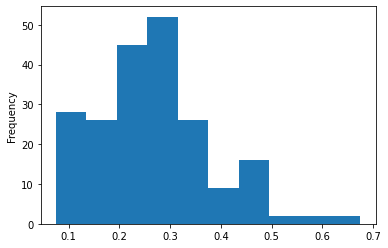

In [89]:
df.predicted_odds.plot(kind='hist')
print(df.predicted_odds.mean())
print(df.predicted_odds.std())

In [90]:
pd.crosstab(df.Black, 
            df.predicted_hire, margins=True)

predicted_hire,False,True,All
Black,,,
0,87,54,141
1,49,18,67
All,136,72,208


In [91]:
pd.crosstab(df.Black, 
            df.Hired)

Hired,0,1
Black,,
0,93,48
1,59,8


# Discussion

What can we conclude based on our analysis so far?


What can't we conclude based on our analysis so far?


What questions does this analysis leave us with?
- reporting questions
- quant questions